# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [1]:
!pip install scikit-plot

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2


## Load Dataset

In [3]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): Apache 2.0
 86% 57.0M/66.0M [00:00<00:00, 84.3MB/s]
100% 66.0M/66.0M [00:00<00:00, 84.7MB/s]


In [4]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [5]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful plots ...

In [ ]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


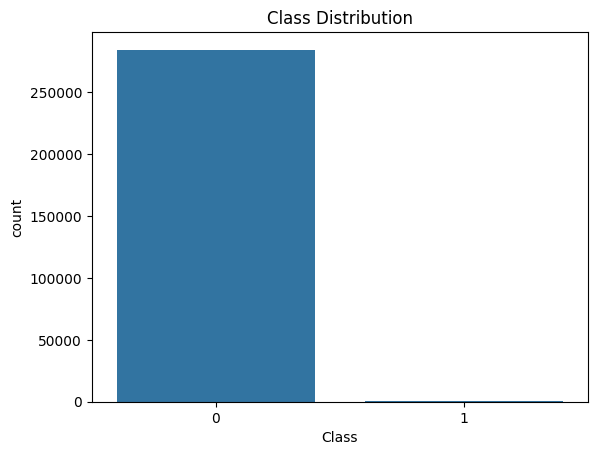

In [ ]:
# ### 2.2 Class Distribution
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [ ]:
# Display the class distribution in percentages
class_counts = df['Class'].value_counts(normalize=True) * 100
print(f"Class Distribution:\n{class_counts}")


Class Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


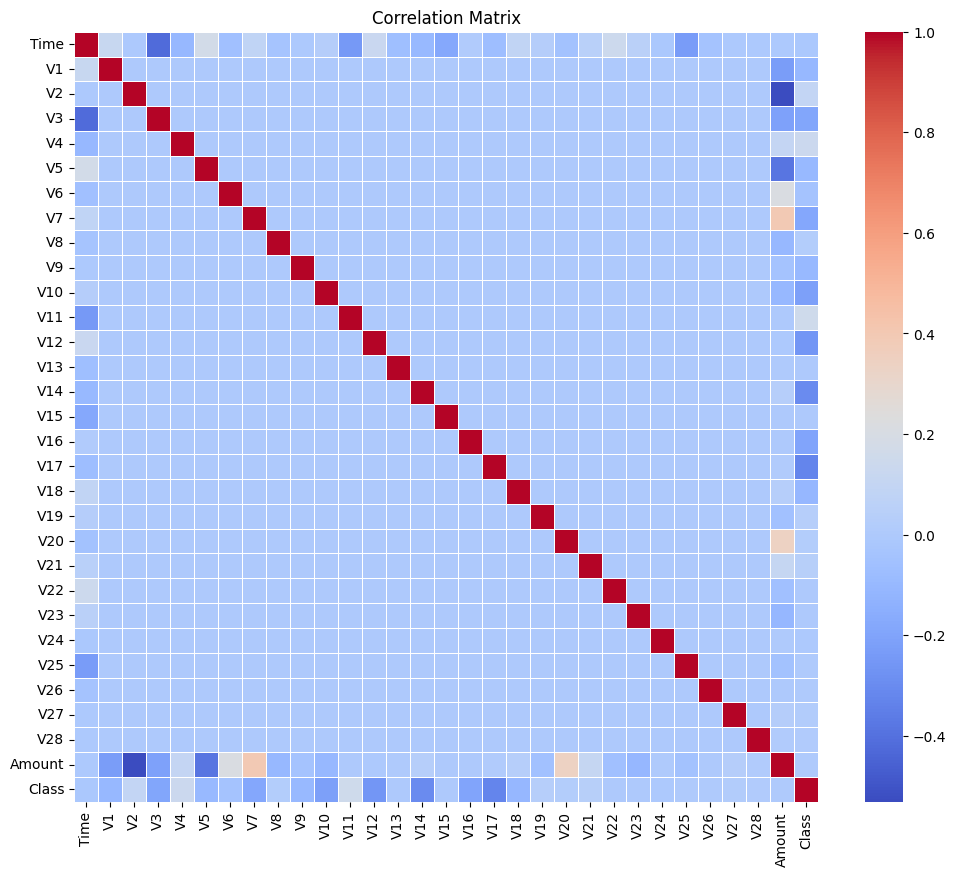

In [ ]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
corr_matrix = df.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

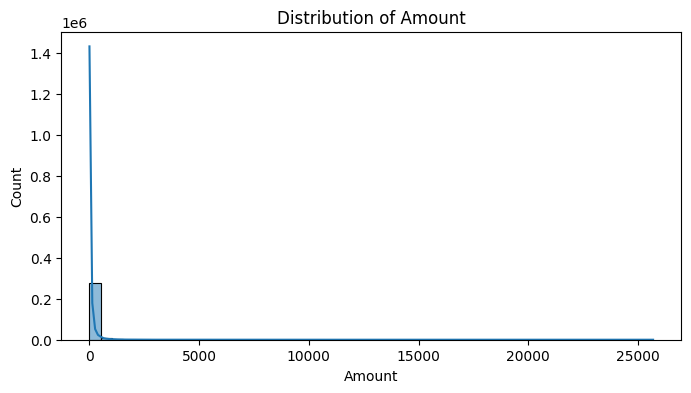

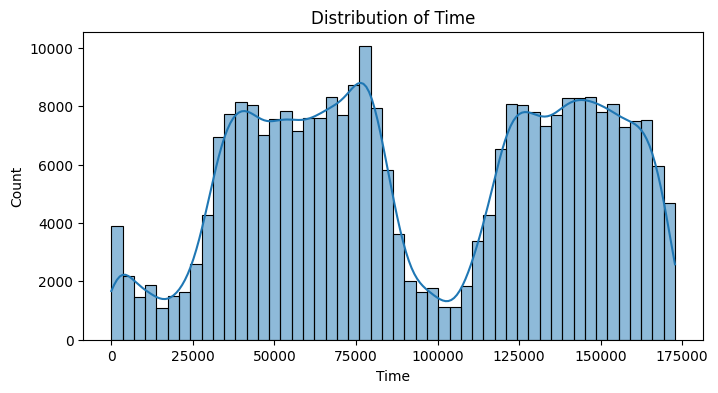

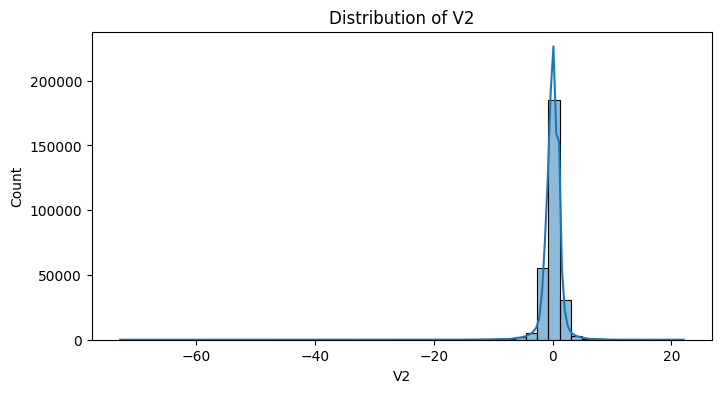

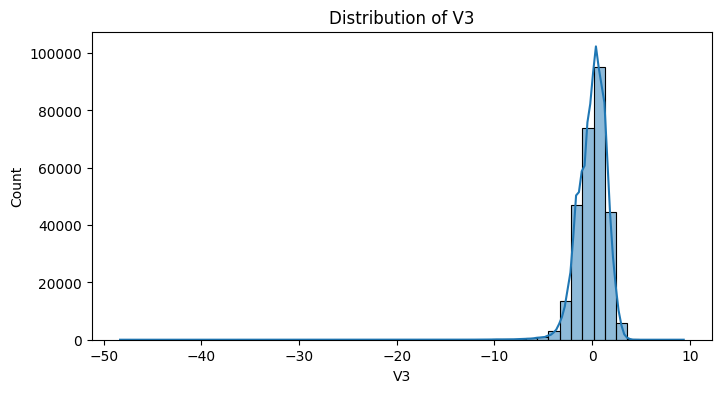

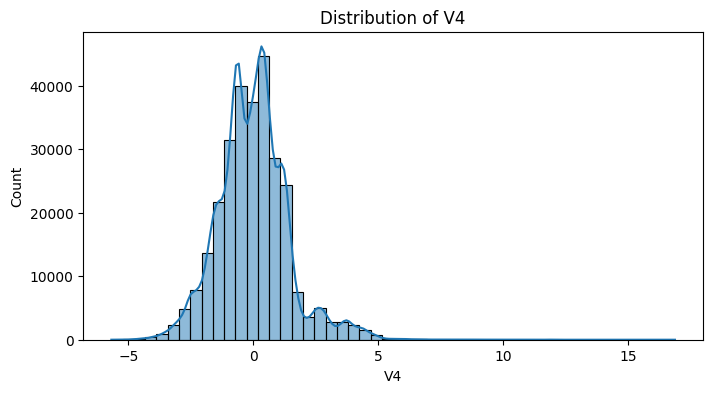

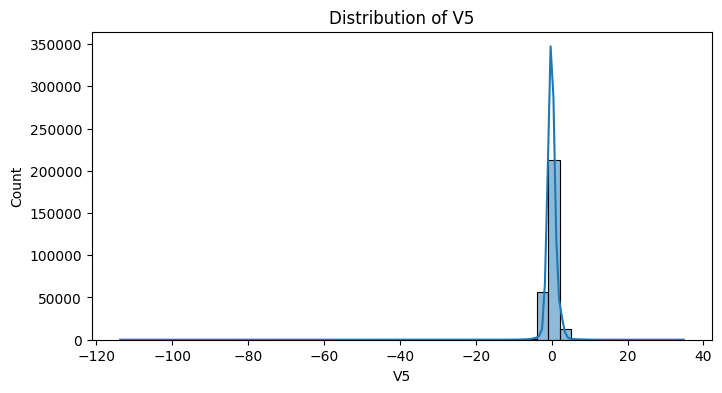

In [ ]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
selected_features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']  # Select features to plot
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


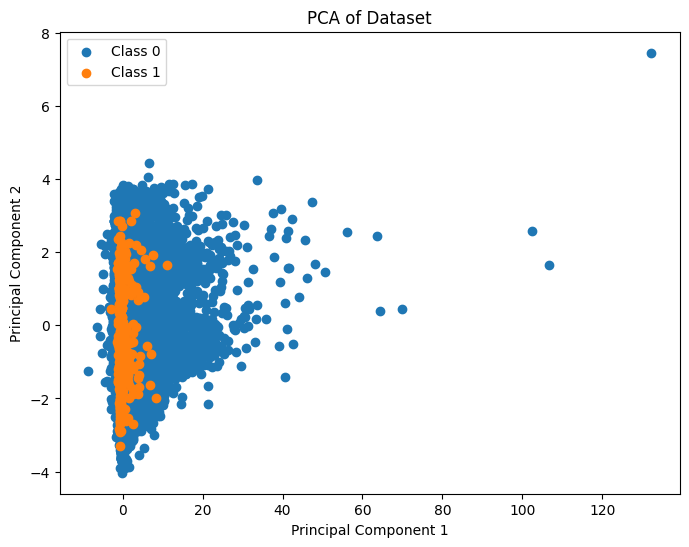

In [11]:
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y.values
# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df['class'] == 0]['PC1'], pca_df[pca_df['class'] == 0]['PC2'], label='Class 0')
plt.scatter(pca_df[pca_df['class'] == 1]['PC1'], pca_df[pca_df['class'] == 1]['PC2'], label='Class 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.legend()
plt.show()


In [24]:
# Outlier detection

# Z-score calculation
from scipy.stats import zscore

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

z_scores = np.abs(zscore(X_scaled))
outliers = np.where(z_scores > 10)  # Threshold is X standard deviations

print(outliers[0].shape, outliers[1].shape)
print("Outliers detected using Z-score:", outliers)

(4530,) (4530,)
Outliers detected using Z-score: (array([   164,    164,   1158, ..., 284249, 284393, 284448]), array([20, 29, 10, ..., 29, 28, 28]))


## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
> 1. Dataset is imbalance
> 2. Features are not in the same scale   
2. Analyze the correlation matrix of the features.
> The correlation matrix illustrates the correlation of each feature with the label and with each other. In this case, the label has the highest correlation with feature v11 and the lowest correlation with feature v17. Additionally, normalizing the feature scale could potentially result in a different correlation matrix.

3. Is your data linearly separable? Please provide a rationale.
> No, there are reasons for this: Logistic regression is a linear model and in the following sections, it doesn't completely fit the data. Additionally, you can use PCA to reduce the dimensionality and visualize the data.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...






In [ ]:
def standardize_features(X_train, X_test):
    # Standardize the features
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [ ]:
def dataset_balancement(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    fraud_indices = np.where(y_train == 1)[0]
    not_fraud_indices = np.where(y_train == 0)[0]
    fraud_records =  len(fraud_indices)

    under_sample_indices = np.random.choice(not_fraud_indices, len(not_fraud_indices), False)
    upper_sample_indices = np.random.choice(fraud_indices, len(y_train), replace=True)

    y_train = y_train[np.concatenate([upper_sample_indices, under_sample_indices])]
    X_train = X_train[np.concatenate([upper_sample_indices, under_sample_indices])]
    print(X_train.shape, y_train.shape)
    return X_train, y_train

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

### Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.63      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

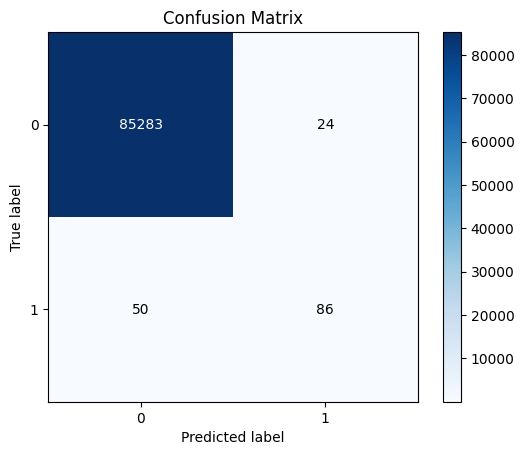

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logreg)

In [ ]:
X_train_, y_train_ = dataset_balancement(X_train, y_train)

(398372, 30) (398372,)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

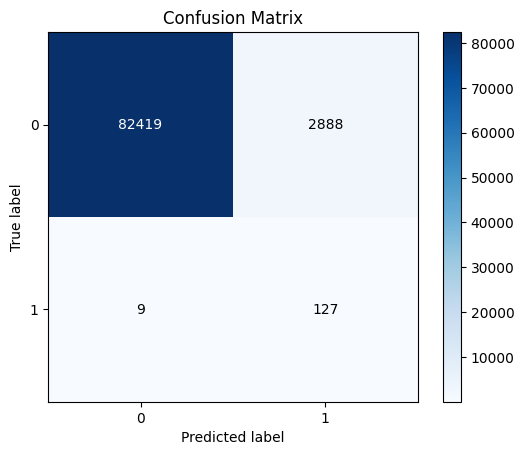

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_, y_train_)
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logreg)

In [ ]:
X_train_, X_test_ = standardize_features(X_train, X_test)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

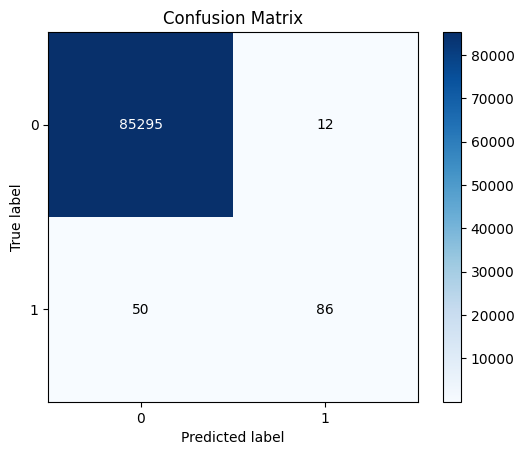

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_, y_train)
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logreg)

In [ ]:
X_train_, y_train_ = dataset_balancement(X_train, y_train)
X_train_, X_test_ = standardize_features(X_train_, X_test)

(398372, 30) (398372,)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

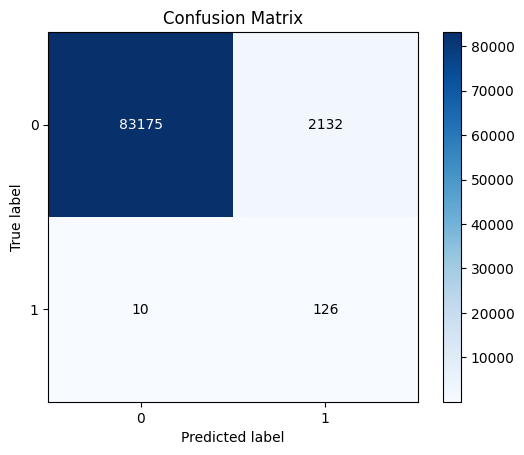

In [ ]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_, y_train_)
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logreg)

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

SVM Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

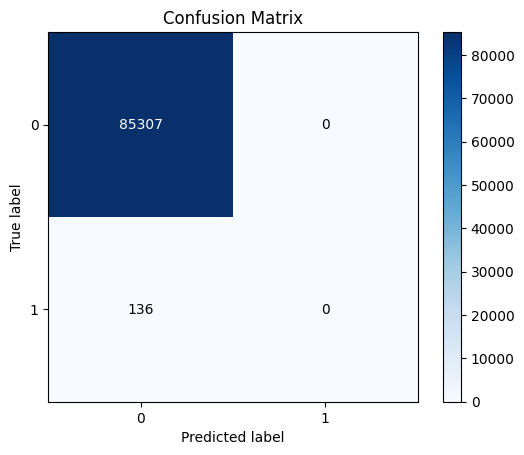

In [ ]:
# Initialize and train the SVM model with a non-linear kernel
svm = SVC()
svm.fit(X_train, y_train)
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)
# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm)

In [ ]:
X_train_, X_test_ = standardize_features(X_train, X_test)

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.68      0.78       136

    accuracy                           1.00     85443
   macro avg       0.96      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

SVM Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

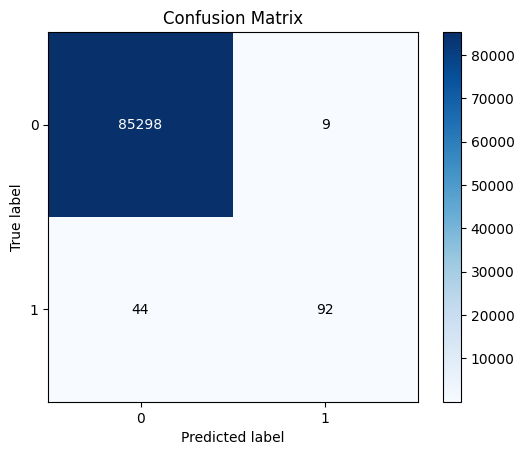

In [ ]:
# Initialize and train the SVM model with a non-linear kernel
svm = SVC()
svm.fit(X_train_, y_train)
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_)
# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm)

In [ ]:
X_train_, X_test_ = standardize_features(X_train, X_test)
X_train_, y_train_ = dataset_balancement(X_train_, y_train)


(398372, 30) (398372,)


In [ ]:
# Initialize and train the SVM model with a non-linear kernel
svm = SVC()
svm.fit(X_train_, y_train_)
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_)
# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm)

In [ ]:
X_train_, y_train_ = dataset_balancement(X_train_, y_train)

(398372, 30) (398372,)


In [ ]:
# Initialize and train the SVM model with a non-linear kernel
svm = SVC()
svm.fit(X_train_, y_train_)
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)
# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm)

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
> There is no definitive answer, as neither model consistently outperforms the other in every scenario. It is often best to try both methods and use cross-validation to compare their performance on your specific dataset with specific preprocessing.

  > Overall Recommendations:

  > 1. Linearly separable data: Both SVM and Logistic Regression can perform well, but SVM may offer a better margin.
  > 2. Large datasets: Logistic Regression is typically faster and easier to implement.
  > 3. Interpretability: Logistic Regression is preferred due to the easier interpretation of its coefficients.
  > 4. Robustness to outliers: SVM is generally a better choice due to its focus on maximizing the margin and reliance on support vectors.
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
> No, Accuracy is generally not a good metric for evaluating model performance on highly imbalanced datasets. This is because accuracy measures the proportion of correct predictions out of all predictions, and in the case of imbalanced datasets, it can be misleading. If the majority class is much larger than the minority class, a model could achieve high accuracy simply by always predicting the majority class, but it would fail to capture the performance on the minority class.


3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric?
> Balance the dataset classes.

  **Student Answer:**  .......

# Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

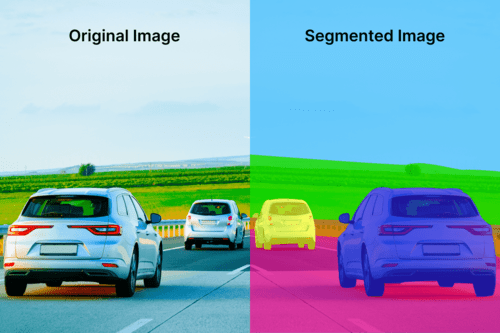

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 66.7MB/s]


In [ ]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


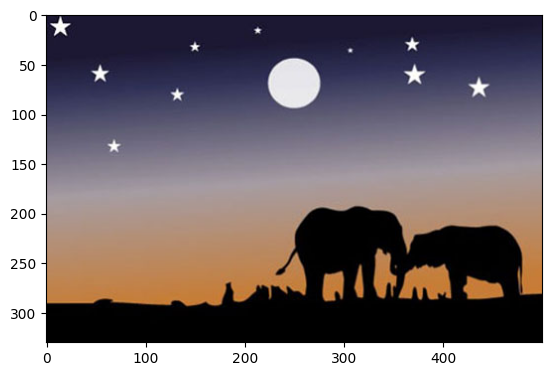

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








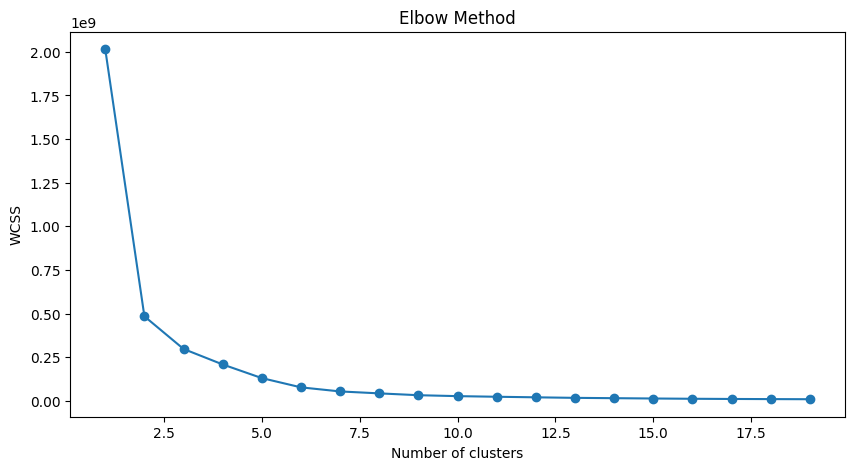

In [ ]:

# Elbow Method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(all_pixels)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Visualize Dominant Color

In [ ]:
dominant_colors = 6
kmeans = KMeans(n_clusters=dominant_colors, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(all_pixels)

KMeans(n_clusters=6, n_init=10, random_state=0)

In [ ]:
centers = kmeans.cluster_centers_
print(centers) # In RGB Format

[[  1.48395319   0.8304368    1.15232881]
 [159.95153443 144.08376216 144.75858439]
 [ 37.13767514  34.33264108  63.43894335]
 [ 93.10533491  90.20952767 114.89101761]
 [232.76071562 232.45583302 236.74058889]
 [189.03952261 132.37580904  83.16011017]]


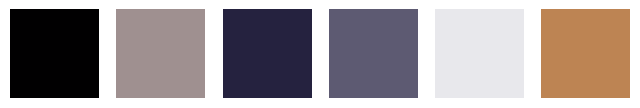

In [ ]:
i = 1
plt.figure(0,figsize=(8,2))
# Storing info in color array
colors = []
for each_col in centers:
    plt.subplot(1,6,i)
    plt.axis("off")
    i+=1

    colors.append(each_col)

    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


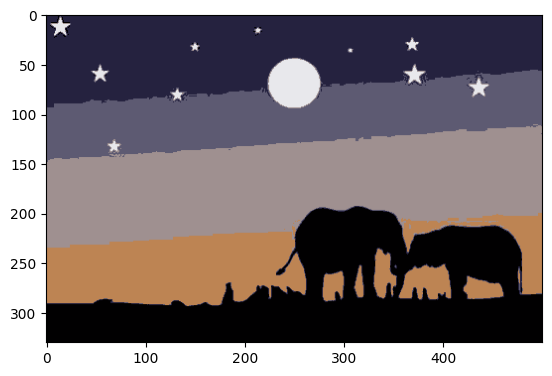

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()